# **The Deep Learning Pipeline**

Building a Deep Learning model isn't just about the network architecture; it is a systematic process. We call this the **Pipeline**. It ensures data flows smoothly and the model learns effectively.

The standard pipeline consists of 4 main stages:

1.   **Data Ingestion & Preprocessing:** Getting data and making it "readable" for the machine (normalization, resizing, etc.).
2.   **Model Architecture:** Designing the structure (layers, neurons).
1.   **Compilation & Training:** Defining how the model learns (Loss function, Optimizer) and running the training loop.
2.   **Evaluation & Inference:** Testing the model on new data to see if it actually works.

# **Lab 1: Introduction to Deep Learning Libraries**

Before coding, we must understand the tools. Deep Learning requires performing massive amounts of matrix calculations. Standard lists in Python are too slow for this.

**TensorFlow (Google):** A powerful library where you define a "graph" of computations. It is widely used in production environments.

**Keras:** A high-level "wrapper" for TensorFlow. It makes writing code extremely simple.

**PyTorch (Meta):** A library favored by researchers because it is "dynamic" and feels very "Pythonic."

**What is a Tensor?**

A Tensor is just a generalized matrix.

**Scalar: ( )** - Just a single number (0D tensor).

**Vector: (10,)** - A list of 10 numbers (1D tensor).

**Matrix: (28, 28)** - A grid (2D tensor), like a grayscale image.

**Batch: (32, 28, 28)** - A stack of 32 images (3D tensor). Models train in batches, not one by one.

### **Part A: TensorFlow & Keras**
**Task:** Install libraries and perform basic Matrix Multiplication.

In [1]:
import tensorflow as tf
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

# 1. Creating Tensors
# A constant tensor (cannot be changed)
tensor_a = tf.constant([[1, 2], [3, 4]])
tensor_b = tf.constant([[5, 6], [7, 8]])

print("Shape of Tensor A:", tensor_a.shape)

# 2. Matrix Multiplication
# In Linear Algebra: (2x2) dot (2x2)
result = tf.matmul(tensor_a, tensor_b)

print("Result of Matrix Multiplication (TF):")
print(result)

# 3. Keras "Hello World" (Defining a simple layer)
from tensorflow.keras.layers import Dense
# A 'Dense' layer is a standard neural network layer
# This creates a layer with 10 neurons
layer = Dense(units=10, activation='relu')

TensorFlow Version: 2.19.0
Shape of Tensor A: (2, 2)
Result of Matrix Multiplication (TF):
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


### **Part B: PyTorch**
**Task:** Install libraries and perform basic Matrix Multiplication.

In [2]:
import torch

print(f"PyTorch Version: {torch.__version__}")

# 1. Creating Tensors
tensor_x = torch.tensor([[1, 2], [3, 4]])
tensor_y = torch.tensor([[5, 6], [7, 8]])

# 2. Matrix Multiplication
# PyTorch uses 'mm' (matrix multiplication) or '@' operator
result_torch = torch.mm(tensor_x, tensor_y)

print("Result of Matrix Multiplication (PyTorch):")
print(result_torch)

PyTorch Version: 2.9.0+cpu
Result of Matrix Multiplication (PyTorch):
tensor([[19, 22],
        [43, 50]])


# **Lab 2: Implement MLP From Scratch & Visualization**

An MLP is the simplest form of a Deep Neural Network.

It consists of three stages:

1.   **Input Layer:** Receives the data.
2.   **Hidden Layer(s):** Where the "magic" (transformation) happens.
1.   **Output Layer:** Gives the final prediction.

The Math (Simplified): Each neuron performs two steps:

1.   **Linear Step:** $Z = W \cdot X + b$ (Weight $\cdot$ Input + Bias)
2.   **Non-Linear Step (Activation):** $A = \sigma(Z)$

Without the activation function ($\sigma$), the neural network would just be a linear regression model. We need "curved" lines to solve complex problems.

### **Part A: The MLP Class (NumPy): XOR Problem**

We will solve the XOR problem (Exclusive OR). A simple straight line cannot solve XOR; the model must learn a non-linear boundary.

Steps:

1.   Initialize Weights (randomly).
2.   **Forward Pass:** Calculate predictions.
1.   **Loss Calculation:** How wrong are we?
2.   **Backward Pass (Backprop):** Calculate gradients (derivatives).
1.   **Optimizer:** Update weights to reduce error.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 2. The MLP Structure
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly and biases to zero
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []

    def forward(self, X):
        # Layer 1 (Hidden)
        self.hidden_linear = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = sigmoid(self.hidden_linear)

        # Layer 2 (Output)
        self.output_linear = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output_final = sigmoid(self.output_linear)
        return self.output_final

    def backward(self, X, y, output, learning_rate):
        # Calculate Error
        error = y - output

        # --- Backpropagation (Chain Rule) ---
        # 1. Calculate Gradients for Output Layer
        d_output = error * sigmoid_derivative(output)

        # 2. Calculate Error for Hidden Layer
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(self.hidden_activation)

        # 3. Update Weights and Biases
        self.weights_hidden_output += self.hidden_activation.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            # Calculate Mean Squared Error
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

# 3. Prepare Data (XOR Table)
# Input: [0,0], [0,1], [1,0], [1,1]
# X = np.array([[0,0], [0,1], [1,0], [1,1]])
X = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]);
# Output: [0], [1], [1], [0]
y = np.array([[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]])

# 4. Train
# nn = SimpleMLP(input_size=2, hidden_size=4, output_size=1)
nn = SimpleMLP(input_size=1, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

print("Final Predictions:")
print(nn.forward(X))

Final Predictions:
[[2.65249439e-05]
 [2.39982334e-05]
 [3.12317075e-05]
 [7.69132339e-05]
 [7.34978611e-04]
 [6.25354933e-02]
 [9.38134548e-01]
 [9.97887091e-01]
 [9.99500719e-01]
 [9.99707360e-01]
 [9.99760079e-01]]


### **Part B: Visualization**

We will look at the Loss Landscape (how error decreased) and the Activation Boundary (how the neural network sees the data).

ValueError: shapes (10000,2) and (1,4) not aligned: 2 (dim 1) != 1 (dim 0)

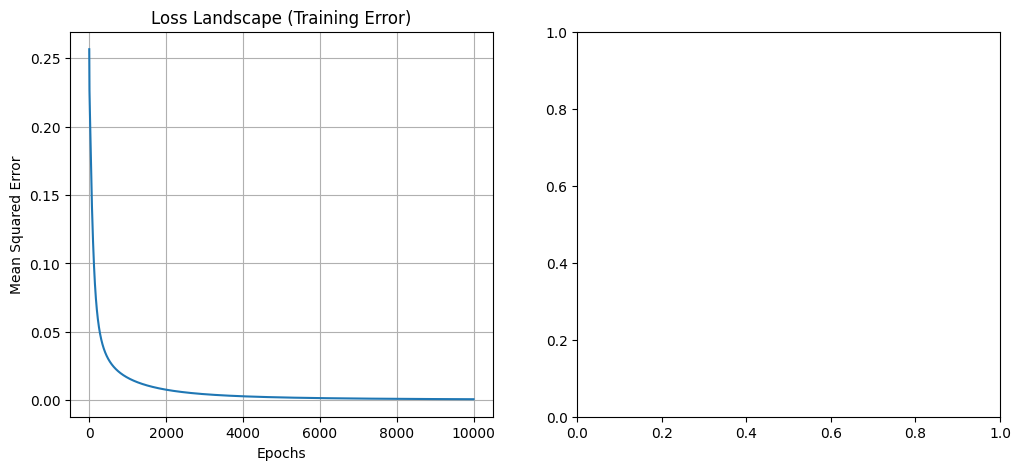

In [4]:
# --- Visualization 1: Loss Curve ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn.loss_history)
plt.title("Loss Landscape (Training Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# --- Visualization 2: Decision Boundary (Activation Landscape) ---
plt.subplot(1, 2, 2)

# Generate a grid of points to check what the model predicts everywhere
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid
probs = nn.forward(grid).reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, probs, levels=20, cmap="RdBu", alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y.flatten(), s=100, cmap="RdBu", edgecolors="white")
plt.title("Decision Boundary Visualization")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

plt.tight_layout()
plt.show()

# **Case Study 1: Handwritten Digit Recognition (MNIST)**

**Task:** We will build a pipeline to classify handwritten digits using the famous MNIST dataset.

1.   **Dataset:** 60,000 images of handwritten numbers (0-9).
2.   **Goal:** The computer sees an image and correctly identifies the number.

**Step 1: Data Loading & Preprocessing**

Neural networks work best with numbers between 0 and 1. Raw images have pixel values between 0 and 255. We must "Normalize" them.

```
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Data
# Keras has the MNIST dataset built-in
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(f"Training Data Shape: {train_images.shape}") # Should be (60000, 28, 28)
print(f"Test Data Shape: {test_images.shape}")

# 2. Preprocessing (Normalization)
# Scale pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3. Visualize a sample
plt.figure(figsize=(2,2))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.axis('off')
plt.show()
```

**Step 2: Model Architecture**

We will use a simple "Feed Forward" network (like the MLP), but deeper.

**Flatten Layer:** Converts the 2D image (28x28 square) into a long 1D list (784 pixels).

**Dense Layer (128 units):** The hidden layer that learns patterns.

**Dropout Layer:** Randomly ignores some neurons during training to prevent "Overfitting" (memorizing instead of learning).

**Output Layer (10 units):** One unit for each digit (0-9). Uses softmax to give probabilities.

```
model = models.Sequential([
    # Flatten 28x28 image to a 784 vector
    layers.Flatten(input_shape=(28, 28)),
    
    # Hidden Layer with ReLU activation
    layers.Dense(128, activation='relu'),
    
    # Dropout (drops 20% of neurons randomly to prevent overfitting)
    layers.Dropout(0.2),
    
    # Output Layer (10 digits) with Softmax (probability distribution)
    layers.Dense(10, activation='softmax')
])

model.summary()
```

**Step 3: Compilation & Training**

Now we configure the "learning rules":

**Optimizer (Adam):** An algorithm that adjusts weights efficiently.

**Loss Function (Sparse Categorical Crossentropy):** Measures error for classification tasks.

**Metrics (Accuracy):** Tracks how many we got right.

```
# 1. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the Model
# Epochs = How many times the model sees the entire dataset
history = model.fit(train_images, train_labels, epochs=5)
```

**Step 4: Evaluation & Inference**

Did the model actually learn? We check the "Loss Curves" and test it on data it has never seen before (test_images).

```
# 1. Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

# 2. Visualize Training Progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy over Epochs")
plt.show()

# 3. Make a Prediction
# Pick the first image from the test set
prediction = model.predict(test_images[:1])
print(f"Model prediction probabilities: {prediction}")
print(f"Predicted Class: {np.argmax(prediction)}") # argmax gives index of highest probability
```
